In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [2]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,-0.166326,-0.524122,-0.425291,0.339014,-0.437440,-0.537097,-0.336670,-0.359205,-0.058553,0.010156,...,0.35,0.07,0.00,0.02,0.07,0.15,0.16,0.27,0.27,0.05
1,0.025710,-0.182495,-0.425291,-0.790589,-0.437440,0.187966,-0.336670,-0.359205,-0.341867,-0.431924,...,0.37,0.16,0.00,0.00,0.05,0.00,0.00,0.63,0.26,0.05
2,0.217745,0.159131,-0.425291,-0.173476,-0.437440,-0.283265,-0.336670,-0.359205,-0.310387,-0.376664,...,0.35,0.09,0.04,0.00,0.00,0.04,0.09,0.48,0.35,0.00
3,-0.742434,-0.524122,-0.425291,0.439202,-0.437440,-0.814006,-0.336670,-0.359205,-0.310387,-0.376664,...,0.37,0.11,0.00,0.05,0.05,0.05,0.11,0.39,0.29,0.05
4,0.217745,0.159131,-0.002242,-0.177867,0.223641,-0.182171,0.341722,0.414753,0.130323,0.341716,...,0.22,0.12,0.00,0.03,0.07,0.05,0.15,0.37,0.25,0.08


In [3]:
X_train.shape

(4462, 35)

In [4]:
X_test.shape

(1623, 35)

In [5]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [6]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [7]:
param_grid_gbc = [
# [{
#     "n_estimators": [500, 750, 1000], # trade-off with learning rate.  More trees the more overfitting.
#    "learning_rate":np.logspace(-3,-2,6),
#     "min_samples_split": range(6,12),
#     "max_features": range(10, 30, 5),
#     "max_depth": range(10, 35, 5)  
# }]
{   'n_estimators': list(range(200,400,20)),
    'learning_rate': np.logspace(-3,-1,20),
    'min_samples_split': list(range(8,20)),
    'max_depth': list(range(3, 10, 2))
                         }]


# Less param try:
# {'n_estimators': 330, 'min_samples_split': 11, 'min_samples_leaf': 20, 'learning_rate': 0.244205309454865}
# 0.9367991704286955
# *****
# 1.0
# 0.9248305606900801

In [8]:
gbc= GradientBoostingClassifier(random_state=1)

from sklearn.model_selection import RandomizedSearchCV, KFold 
gbc_RandomGrid = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid_gbc, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1)

In [9]:
gbc_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'learning_rate': array([0.001     , 0.00127427, 0.00162378, 0.00206914, 0.00263665,
       0.00335982, 0.00428133, 0.00545559, 0.00695193, 0.00885867,
       0.01128838, 0.0143845 , 0.01832981, 0.02335721, 0.02976351,
       0.0379269 , 0.0483293 , 0.06158482, 0.078476  , 0.1       ]),
                                         'max_depth': [3, 5, 7, 9],
                                         'min_samples_split': [8, 9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19],
                                         'n_estimators': [200, 220, 240, 260,
                                                          280, 300, 320, 340,
                                      

In [16]:
print(gbc_RandomGrid.best_params_)
print(gbc_RandomGrid.best_score_) # CV score 
print("*****")
print(gbc_RandomGrid.score(X_train, y_train))
print(gbc_RandomGrid.score(X_test, y_test))

# # Our param and scores: 
# {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 35, 'max_depth': 5, 'learning_rate': 0.1}
# 0.9403841035658511
# *****
# 1.0
# 0.922365988909427


# 1st Grid:
# {'n_estimators': 1500, 'min_samples_split': 8, 'max_features': 25, 'max_depth': 20, 'learning_rate': 0.021544346900318832}
# 0.9421783277007517
# *****
# 1.0
# 0.933456561922366

# 2nd Grid:
# {'n_estimators': 1000, 'min_samples_split': 11, 'max_features': 15, 'max_depth': 25, 'learning_rate': 0.01}
# 0.939489000145627
# *****
# 1.0
# 0.9353049907578558

# 3rd Grid:
# {'n_estimators': 750, 'min_samples_split': 7, 'max_features': 10, 'max_depth': 25, 'learning_rate': 0.003981071705534973}
# 0.9370226324326225
# *****
# 1.0
# 0.9371534195933456

# 4th grid:
# {'n_estimators': 750, 'min_samples_split': 7, 'max_features': 10, 'max_depth': 25, 'learning_rate': 0.003981071705534973}
# 0.9370226324326225
# *****
# 1.0
# 0.9371534195933456

# 5th grid:
# {'n_estimators': 260, 'min_samples_split': 9, 'max_depth': 5, 'learning_rate': 0.04832930238571752}
# 0.935454883272488
# *****
# 0.9959659345584939
# 0.922365988909427


{'n_estimators': 260, 'min_samples_split': 9, 'max_depth': 5, 'learning_rate': 0.04832930238571752}
0.935454883272488
*****
0.9959659345584939
0.922365988909427


In [17]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = gbc_RandomGrid.best_estimator_.predict(X_test) 
cm_gbc_Random = confusion_matrix(y_true, y_pred)
cm_gbc_Random

# Our param: 
# array([1403, 66],
#       [60  , 92]])
   
# 2nd Grid: 
# array([[1430,   41],
#        [  64,   88]], dtype=int64)

# 3rd Grid:
# array([[1447,   24],
#        [  78,   74]], dtype=int64)

# 4th grid:
# array([[1447,   24],
#        [  78,   74]],

# 5th grid:
# array([[1403,   68],
#        [  58,   94]], dtype=int64)

array([[1403,   68],
       [  58,   94]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

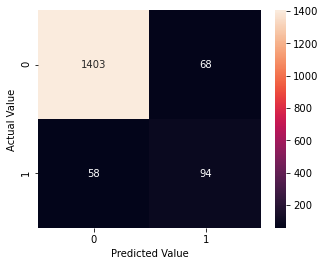

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_gbc_Random, annot=True,fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [20]:
recall_gbc = 92/(92+60)
recall_gbc 
# with our param: 0.6052631578947368

# 2nd grid: 0.5789473684210527
88/(88+64)

# 3rd grid: 0.4868421052631579
74/(74+78)

# 5th grid: 0.618421052631579
94/(94+58)

0.618421052631579

In [21]:
# Feature Importance
gbc_final = gbc_RandomGrid.best_estimator_
feature_importance = list(zip(X_train.columns, gbc_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_count', 0.47484059405857376),
 ('Unique_ClmAdmitDiagnosisCode', 0.05269058753763893),
 ('Unique_DiagnosisGroupCode', 0.04859600771897891),
 ('Claim_count', 0.04400300837894786),
 ('Age_30-40', 0.03885801203341938),
 ('ClmAdmitDiagnosisCode_count', 0.028646870024369286),
 ('Unique_States', 0.02636782389687991),
 ('Age_50-60', 0.02377405386952692),
 ('Unique_patients', 0.02376252701769389),
 ('Age_20-30', 0.021487522884175117),
 ('Avg_Total_ClmProcedureCode', 0.01765335818822789),
 ('Avg_TotalClaimCost_PerPatient', 0.017554892951556062),
 ('Age_40-50', 0.01626943778305735),
 ('Avg_AdmissionDuration', 0.015516214260644595),
 ('Avg_ClaimDuration', 0.012703393469459449),
 ('Unique_County', 0.012598222668464833),
 ('Avg_TotalClaimCost', 0.011079136772570771),
 ('Avg_Total_ClmDiagnosisCode', 0.010821769190930157),
 ('Age_70-80', 0.009929371830566743),
 ('Avg_Total_Physician', 0.00909165283435272),
 ('Age_90-101', 0.008356234331433501),
 ('ChronicCond_Alzheimer', 0.008125

<BarContainer object of 35 artists>

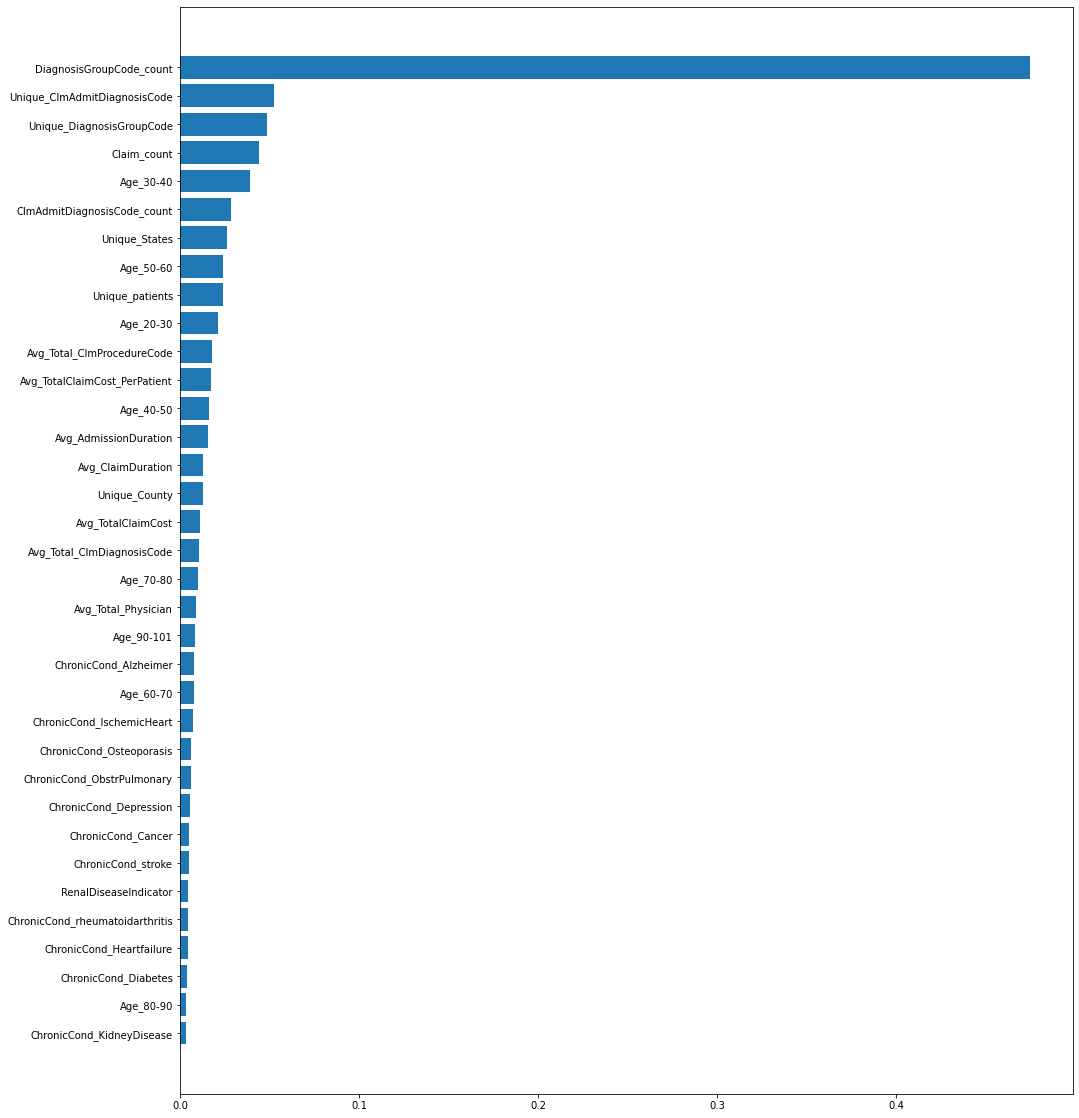

In [22]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=False))
plt.figure(figsize=(16,20))
plt.barh(features, importance) 

Our Gradient Boosting Classifier model gave the result of AUC_ROC score of 92.24% and Recall of 0.62 